Importing libraries.

In [40]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


Adding the required data.

In [41]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


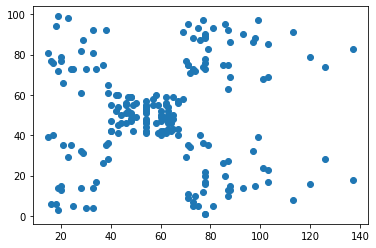

In [42]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

Segregating important data.

In [43]:
df.pop("Gender")
df.pop("CustomerID")
df.pop("Age")
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


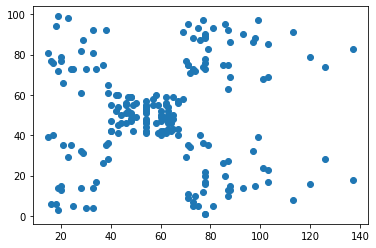

In [58]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

Elbow method to find number of clusters needed.

In [46]:
sse=[]
krange=range(1,10)
for k in krange:
  km=KMeans(n_clusters=k)
  km.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])
  sse.append(km.inertia_)

In [47]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37442.247450375704,
 30273.394312070042,
 25043.970949607214,
 21809.92756261518]

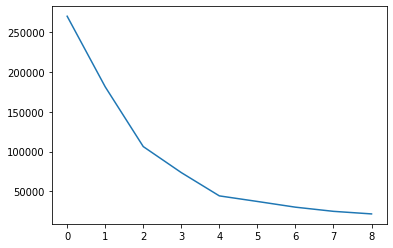

In [48]:
plt.plot(sse)

Using K-Means 

In [49]:
km=KMeans(n_clusters=5)
km.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])
df["cluster"]=km.fit_predict(df[["Annual Income (k$)","Spending Score (1-100)"]])  
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


Separating data based on clusters and plotting the data.

Text(0, 0.5, 'Spending Score (1-100)')

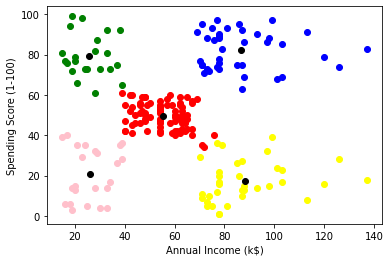

In [57]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]
df4=df[df["cluster"]==3]
df5=df[df["cluster"]==4]

plt.scatter(df1["Annual Income (k$)"],df1["Spending Score (1-100)"],color="red")
plt.scatter(df2["Annual Income (k$)"],df2["Spending Score (1-100)"],color="blue")
plt.scatter(df3["Annual Income (k$)"],df3["Spending Score (1-100)"],color="green")
plt.scatter(df4["Annual Income (k$)"],df4["Spending Score (1-100)"],color="yellow")
plt.scatter(df5["Annual Income (k$)"],df5["Spending Score (1-100)"],color="pink")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

Here we find 5 clusters of customers based on their annual income and spending score.
